In [47]:
import tucu_saltena_fun as fu
import di_python.ya_esta as ye
import importlib
importlib.reload(fu);

In [8]:
TMP_DIR = '/tmp/aliagadi'
TMP_DIR = '/tmp/wrf_tmp'
dir_path = '../tucu-april-data/WRF/'
dir_path = '../tucu-april-rm-data/WRF/'
plot_path = '/'

In [9]:

file_list = fu.get_file_list(dir_path, ext='wrfout')

In [11]:
dd=['d01','d02','d03','d04']
mega_l={}
for d in dd:
    mega_l[d]=fu.get_mega_list(d,file_list)

In [36]:
ind = 1
row3 = mega_l['d03'].iloc[ind]
row4 = mega_l['d04'].iloc[ind]

In [37]:
row3

wrf_index                                                    1
name                            wrfout_d03_2018-04-05_06:00:00
dom                                                        d03
path         ../tucu-april-rm-data/WRF/wrfout_d03_2018-04-0...
Name: 2018-04-05 06:15:00, dtype: object

In [44]:
nds3 = wrf.getvar(netCDF4.Dataset(row3.path),'tc')[0]
nds4 = wrf.getvar(netCDF4.Dataset(row4.path),'tc')[0]

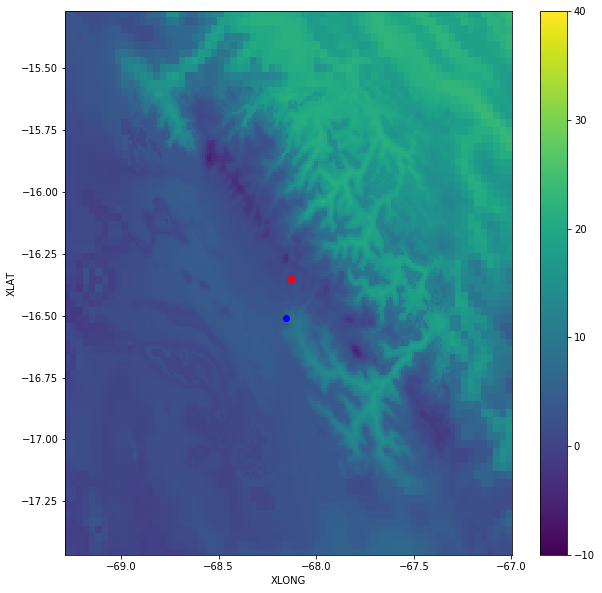

In [48]:
fig, ax = plt.subplots()
# nds3.plot.imshow()
# vm=min(fu_.get_fun(xr.DataArray.min))
# vM=max(fu_.get_fun(xr.DataArray.max))
vm=-10
vM=40
m1 = nds3.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
nds4.plot(x='XLONG',y='XLAT',ax=ax,add_colorbar=False,vmin=vm,vmax=vM)
fig.set_size_inches(10,10)
fig.colorbar(m1)

gb = wrf.geo_bounds(nds4)

lam = gb.bottom_left.lat
lom = gb.bottom_left.lon
laM = gb.top_right.lat
loM = gb.top_right.lon

lad = laM-lam
lod = loM-lom
par = .2
lap = lad * par 
lop = lod * par 

ax.set_ylim(lam-lap,laM+lap)
ax.set_xlim(lom-lop,loM+lop)
ax.set_title('')

ax.scatter(*ye.LOLA_CHC,c='r')
ax.scatter(*ye.LOLA_LPZ,c='b')